In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
## Read loan csv and create DF
## Set Low Memory False to remove Dtype warring 
df = pd.read_csv("loan.csv", low_memory=False)


In [41]:
df.shape

(39717, 111)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [47]:
#percentage of missing value
100*df.isnull().mean()
# df.head()

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [45]:
# df1 = df.drop("Cabin", axis=1)
# 100*df1.isnull().mean()

KeyError: "['Cabin'] not found in axis"

In [98]:
#Create new DataFrame and drop columns from 54 onwardss
df1 = df = df.iloc[:, :54]
df1.shape


(39717, 54)

In [90]:
100*df1.isnull().mean()

id                               0.000000
member_id                        0.000000
loan_amnt                        0.000000
funded_amnt                      0.000000
funded_amnt_inv                  0.000000
term                             0.000000
int_rate                         0.000000
installment                      0.000000
grade                            0.000000
sub_grade                        0.000000
emp_title                        6.191303
emp_length                      44.759171
home_ownership                   0.000000
annual_inc                       0.000000
verification_status              0.000000
issue_d                          0.000000
loan_status                      0.000000
pymnt_plan                       0.000000
url                              0.000000
desc                            32.585543
purpose                          0.000000
title                            0.027696
zip_code                         0.000000
addr_state                       0

In [99]:
#Dropped missing values
missingValueArray = ["annual_inc_joint","mths_since_last_major_derog", "next_pymnt_d","mths_since_last_record","mths_since_last_delinq"]
df1 = df1.drop(missingValueArray, axis = 1)
df1.shape

(39717, 49)

In [100]:
#Find Data type of DF
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [93]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL


In [116]:
# All columns - In STR
df1.columns=df1.columns.astype(str)

<h3> Label encoding </h3>

In [105]:
# 

#Change Grade Cat var to Cat Num var
df1['grade_encoded'] = df1['grade'].factorize()[0]

#Change home_ownership Cat var to Cat Num var
df1['home_ownership_encoded'] = df1['home_ownership'].factorize()[0]



0        10.0
1         1.0
2        10.0
3        10.0
4         1.0
         ... 
39712     NaN
39713     NaN
39714     1.0
39715     1.0
39716     1.0
Name: emp_length, Length: 39717, dtype: float64

In [ ]:
# Convert emp_length into num var
df1['emp_length'] = df1['emp_length'].str.replace('+ years', '', regex=False).str.replace('< ', '', regex=False).str.replace('year', '', regex=False)
df1['emp_length'] = pd.to_numeric(df1['emp_length'], errors='coerce')
df1['emp_length'] 

In [107]:
# Convert term into num var
df1['term'] = df1['term'].str.replace('months', '', regex=False)
df1['term'] = pd.to_numeric(df1['term'], errors='coerce')
df1['term'] 

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: int64

In [136]:
#Change verification_status Cat var to Cat Num var
df1['verification_status'] = df1['verification_status'].factorize()[0]

In [139]:
#Change loan_status Cat var to Cat Num var
df1['loan_status'] = df1['loan_status'].factorize()[0]

In [142]:
#Change purpose Cat var to Cat Num var
df1['purpose'] = df1['purpose'].factorize()[0]

In [155]:
df1['revol_util'] = df1['revol_util'].str.replace('%', '', regex=False)
df1['revol_util'] = pd.to_numeric(df1['revol_util'], errors='coerce')

In [ ]:
# df1['int_rate']
# Convert int_rate into num var
df1['int_rate'] = df1['int_rate'].str.replace('%', '', regex=False)
df1['int_rate'] = pd.to_numeric(df1['int_rate'], errors='coerce')
df1['int_rate']

In [226]:
#Creating Num var
num_cols = ['revol_util','recoveries','purpose','loan_status','verification_status','installment','annual_inc','loan_amnt', 'funded_amnt', 'int_rate', 'grade_encoded', 'home_ownership_encoded', 'emp_length', 'term', 'delinq_2yrs','revol_bal', 'inq_last_6mths','out_prncp', 'out_prncp_inv']

<h3>Ouliers</h3>

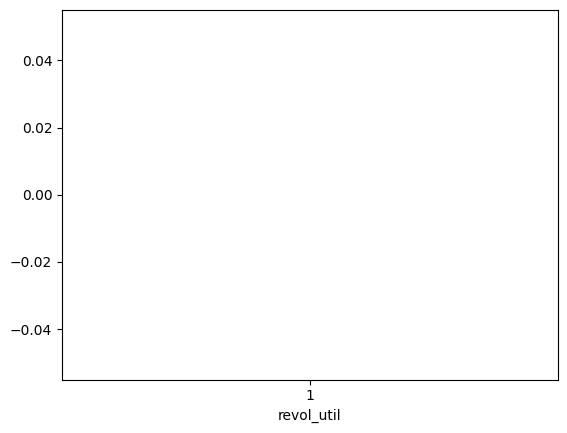

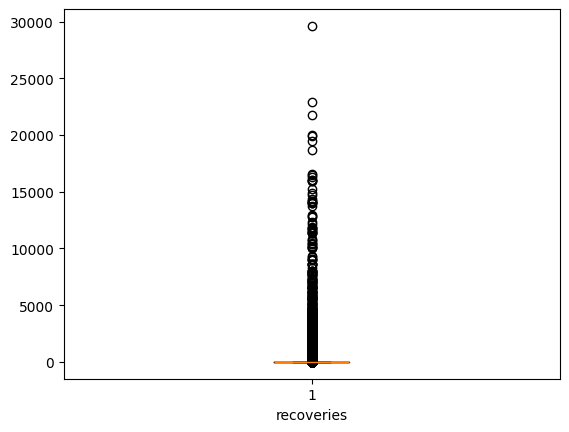

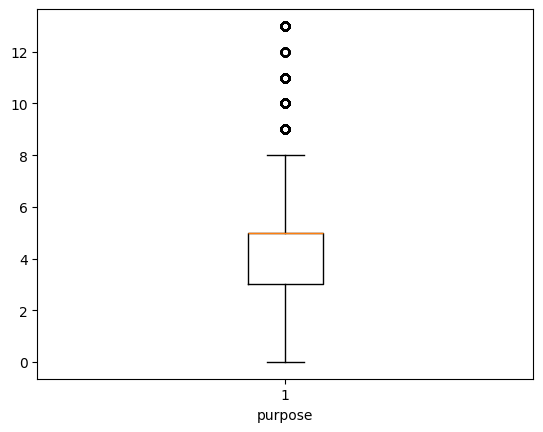

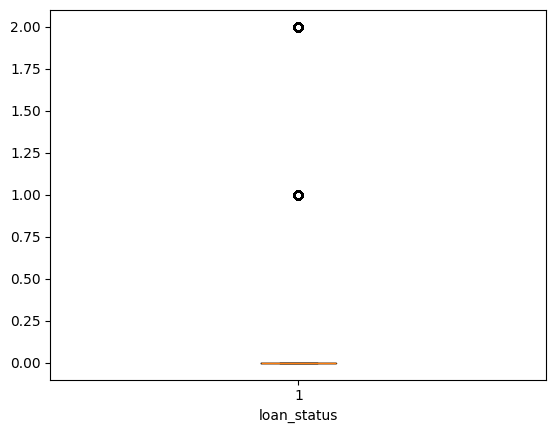

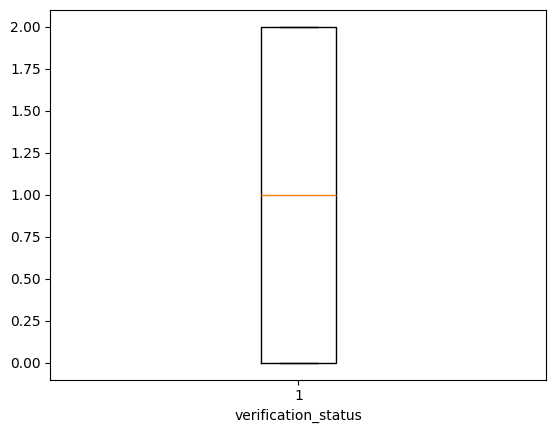

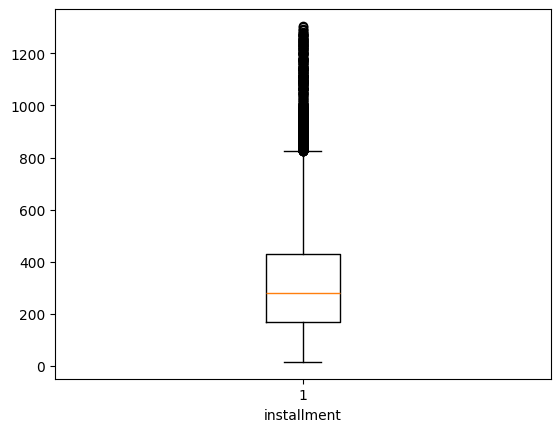

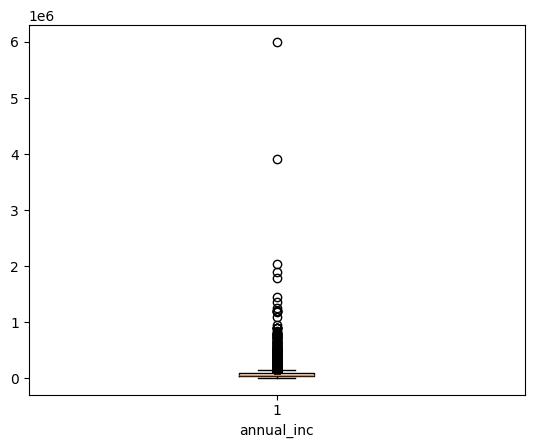

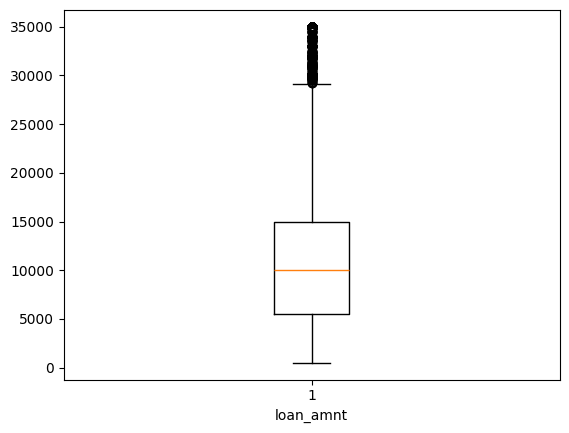

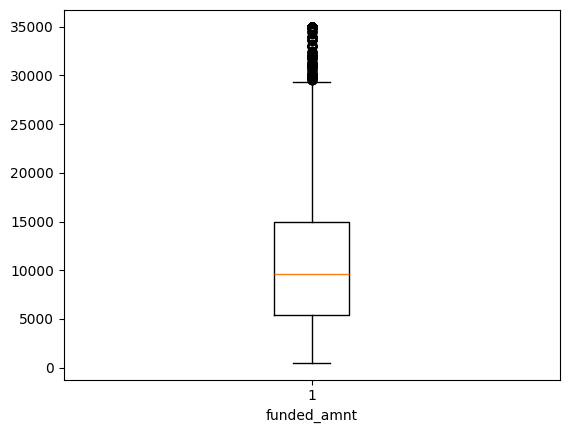

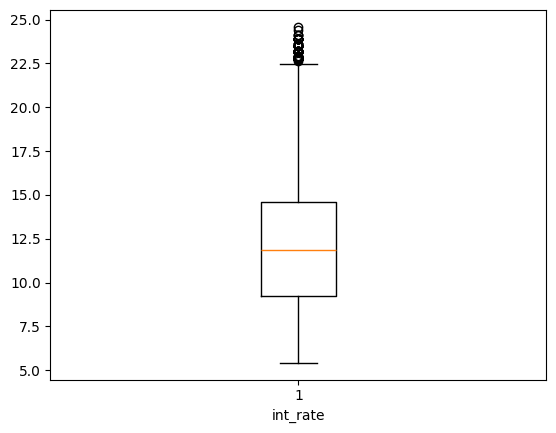

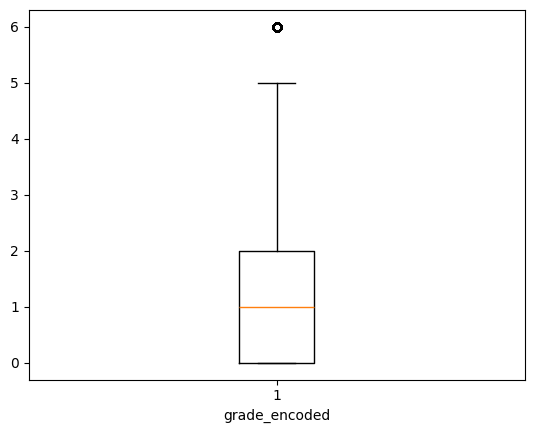

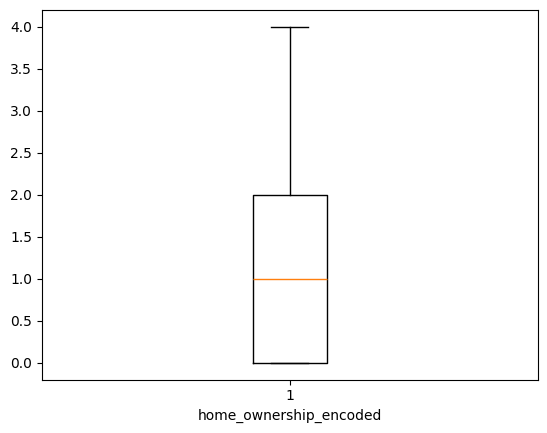

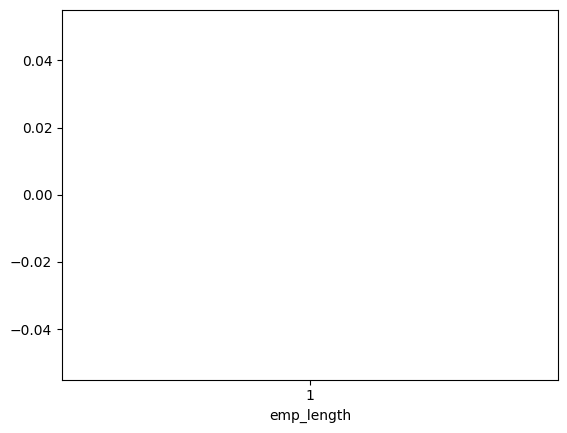

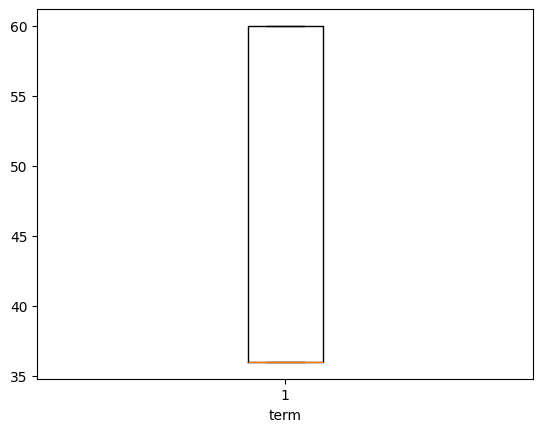

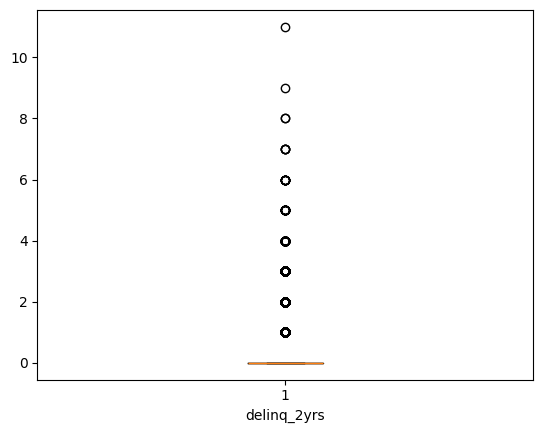

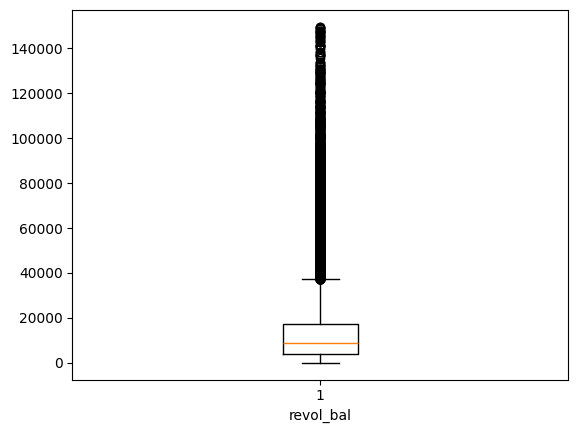

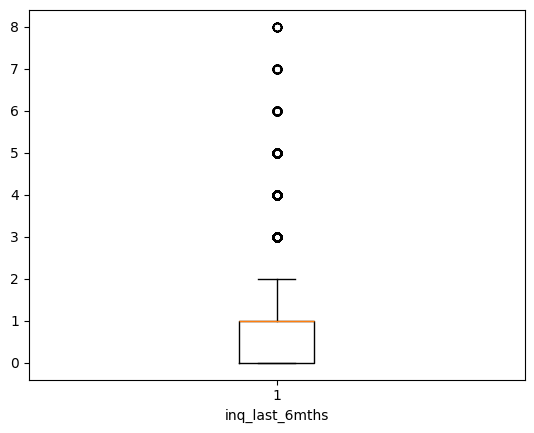

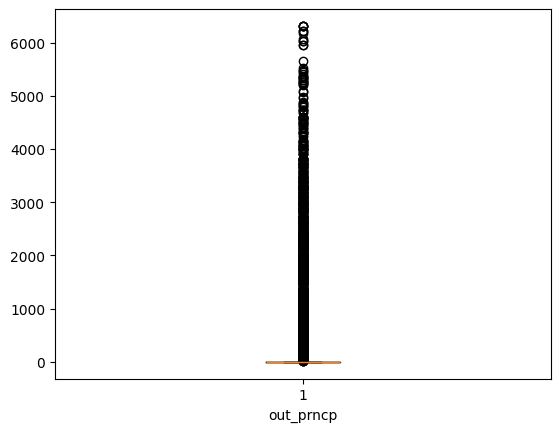

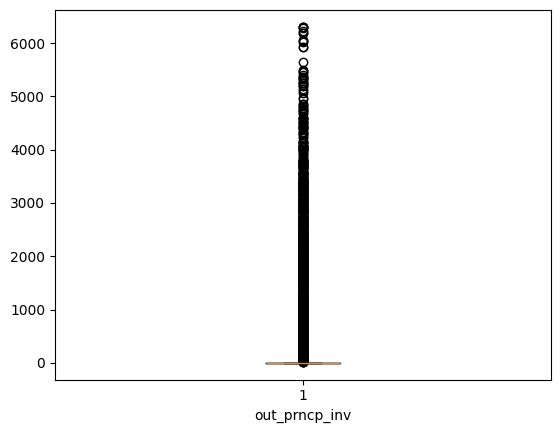

In [168]:
for i in num_cols:
    plt.boxplot(x=[df1[i]])
    plt.xlabel(i)
    plt.show()

<h3>Univariate Analysis</h3>

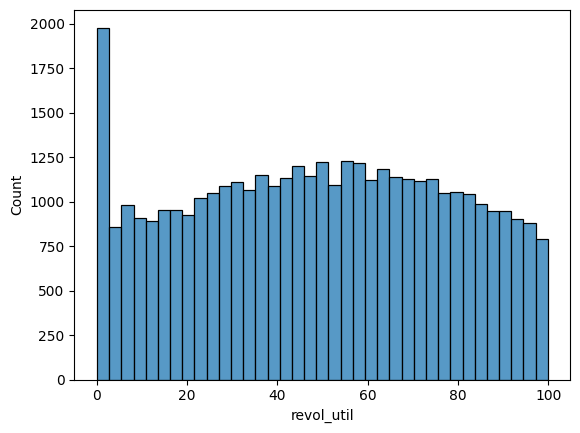

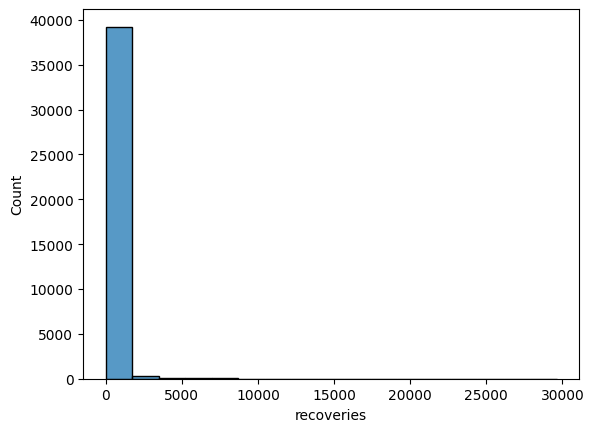

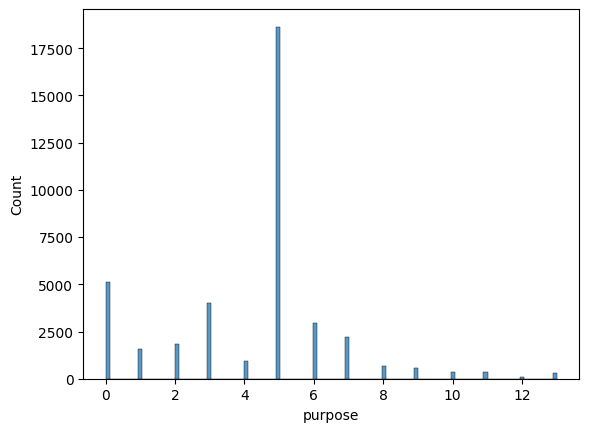

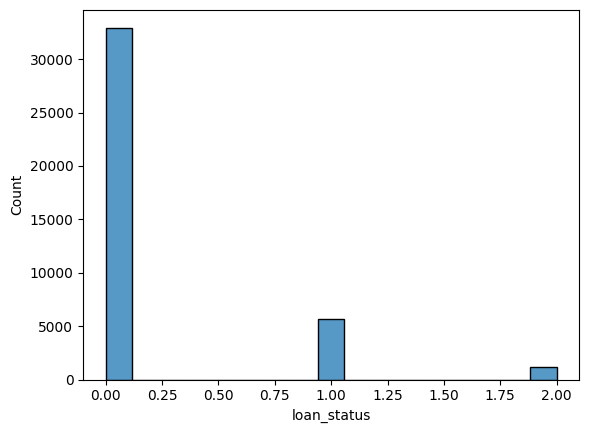

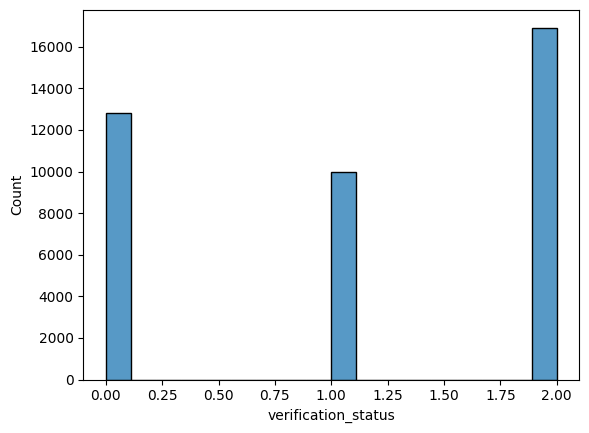

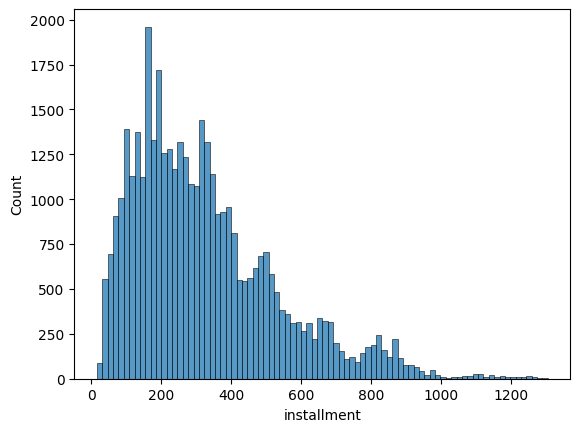

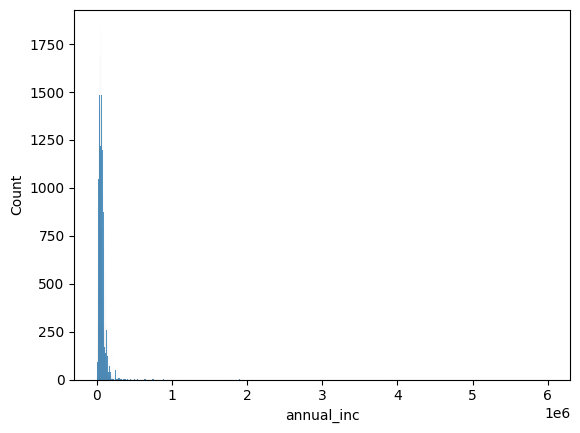

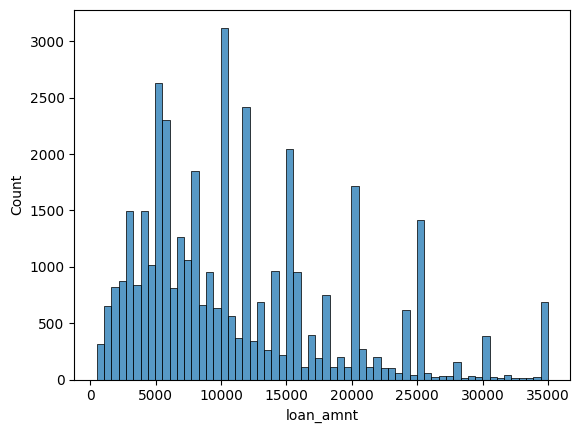

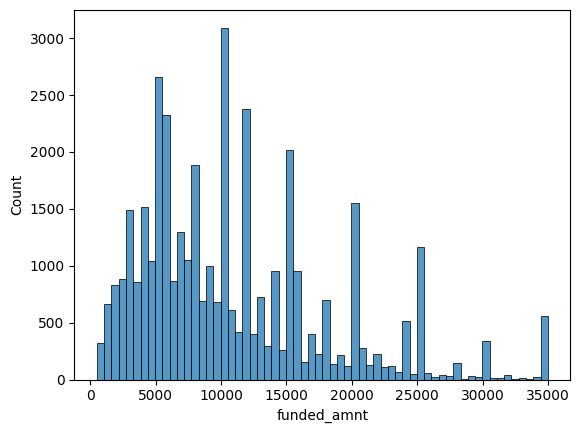

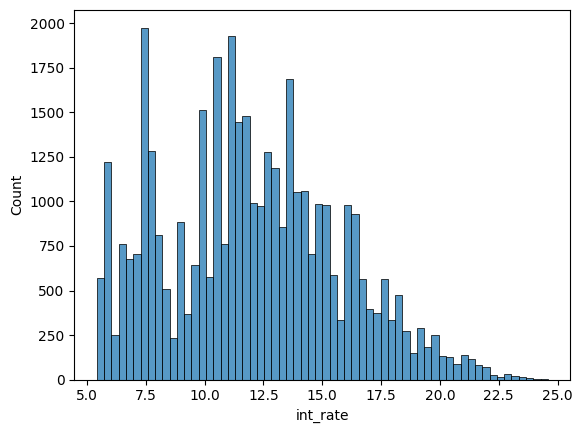

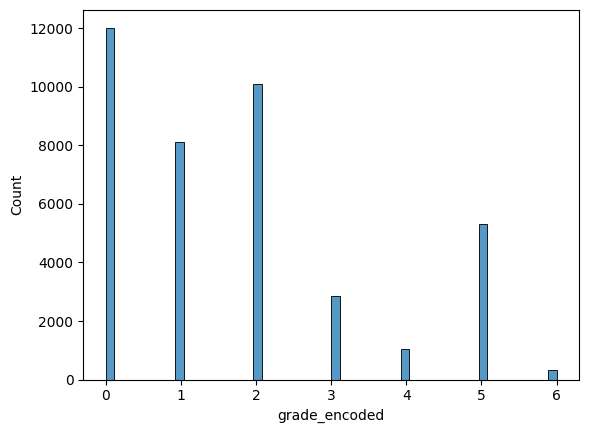

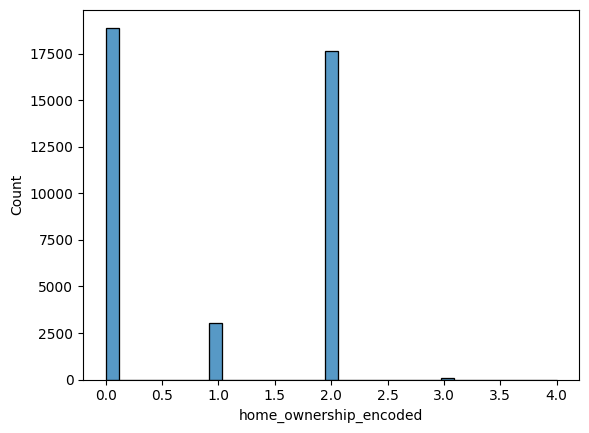

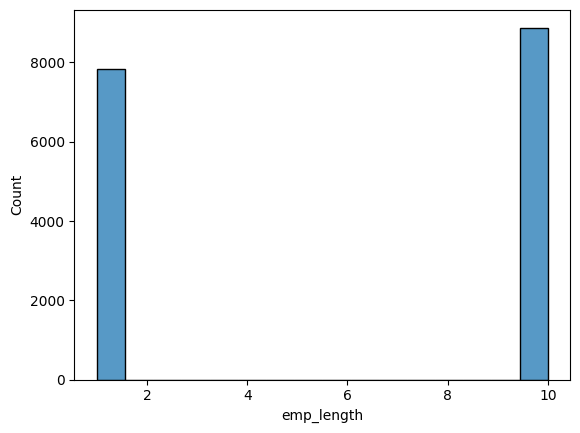

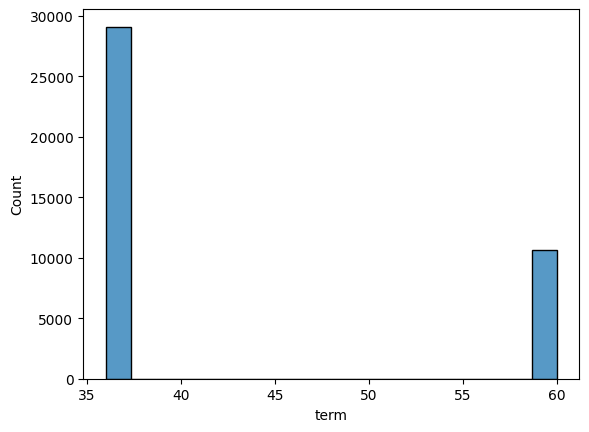

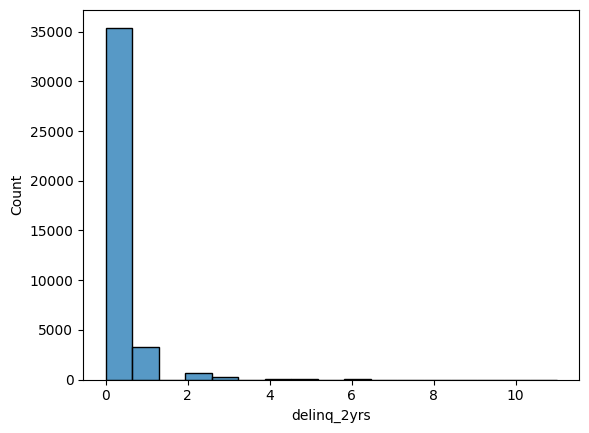

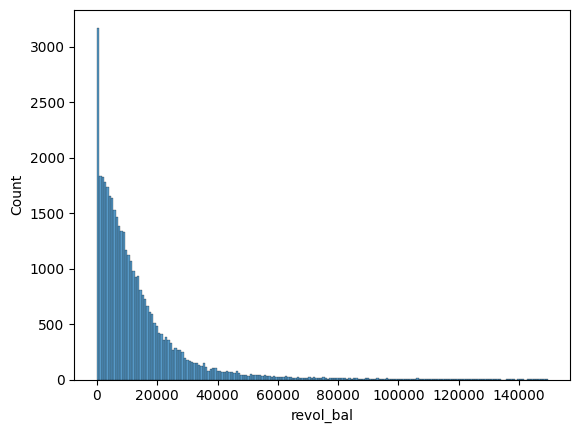

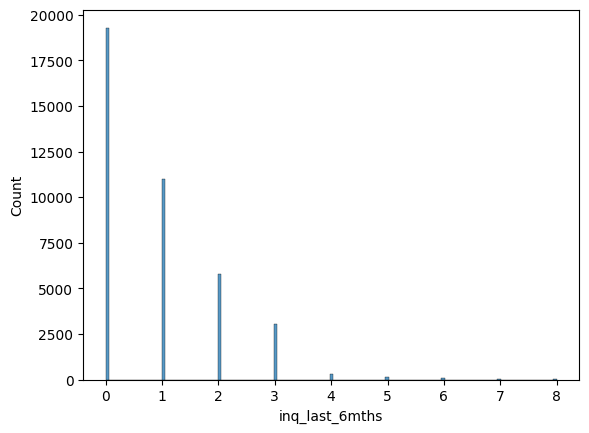

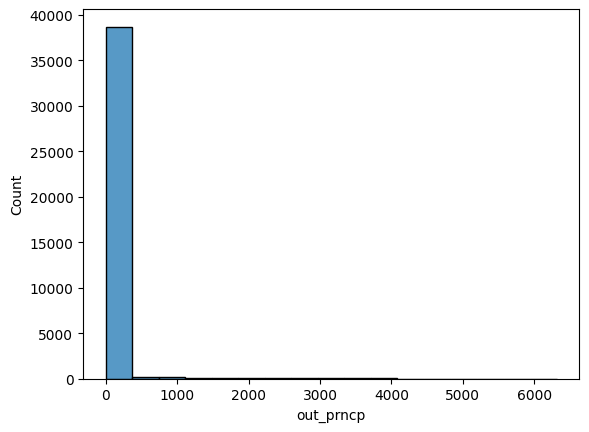

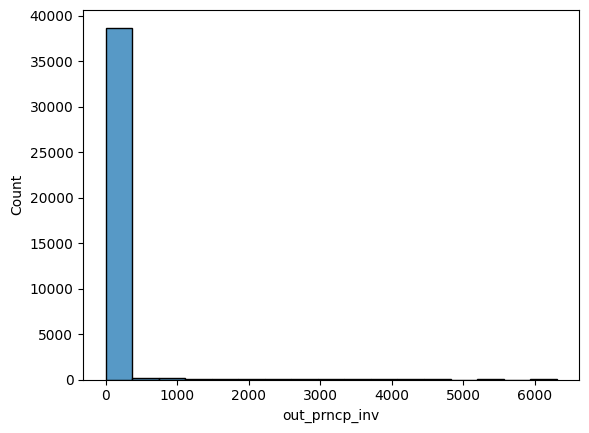

In [164]:
for i in num_cols:
    sns.histplot(x=df1[i])
    plt.show()

<h3> Bivariate Analysis </h3>

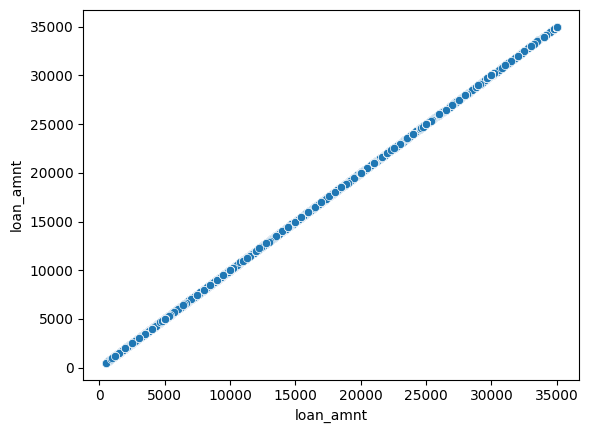

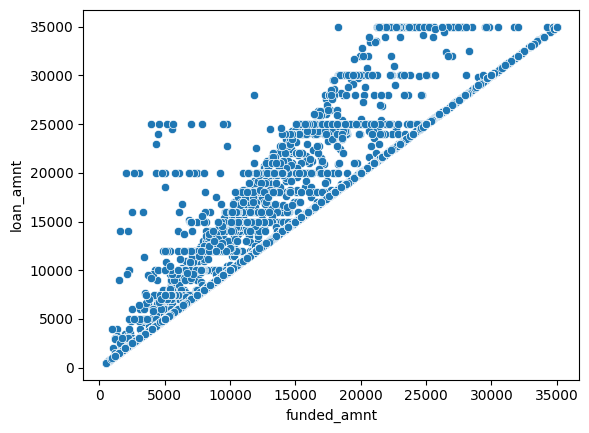

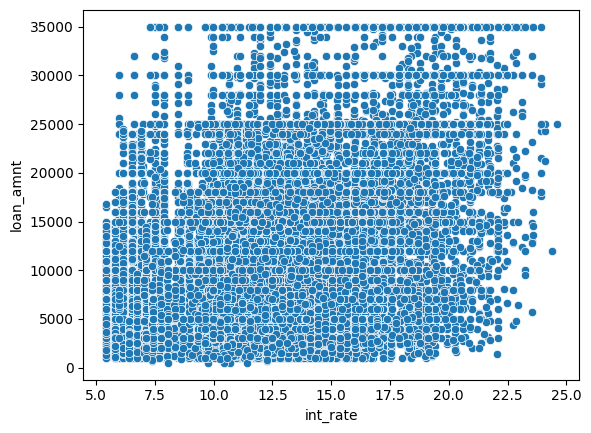

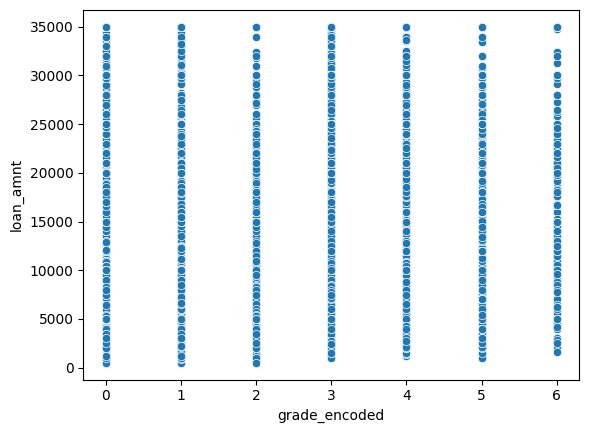

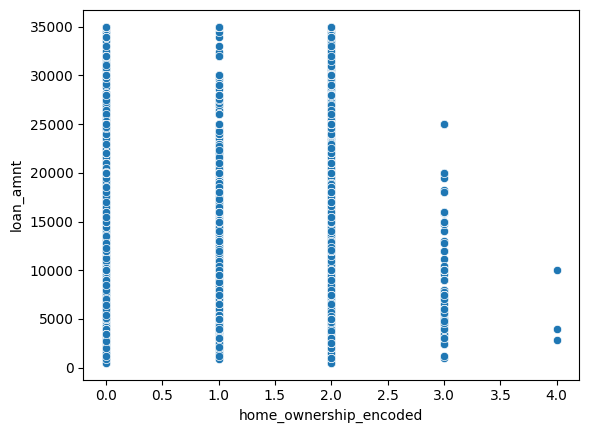

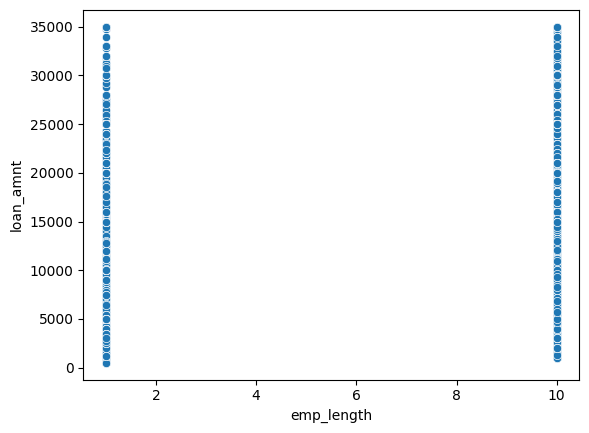

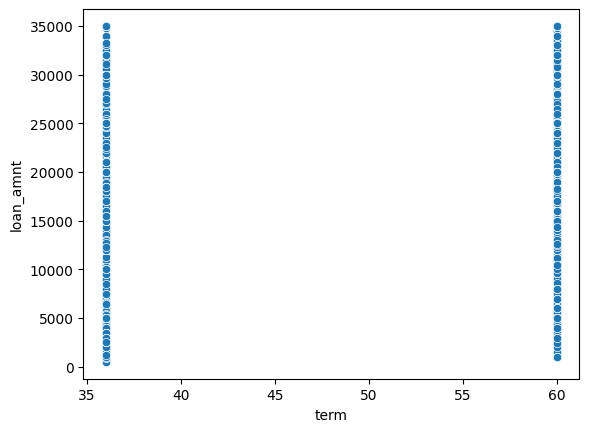

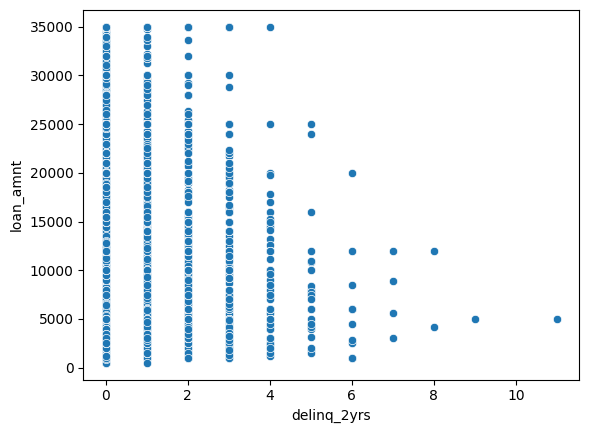

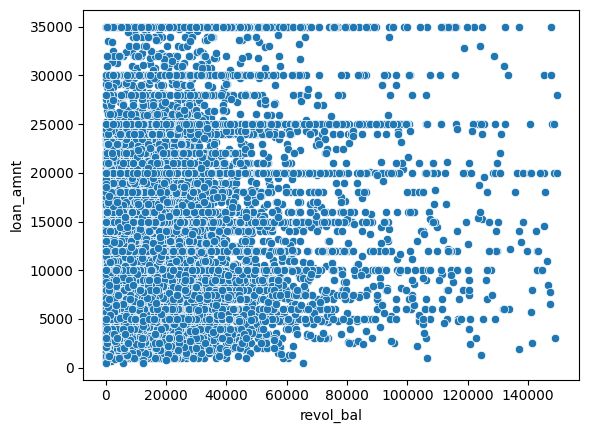

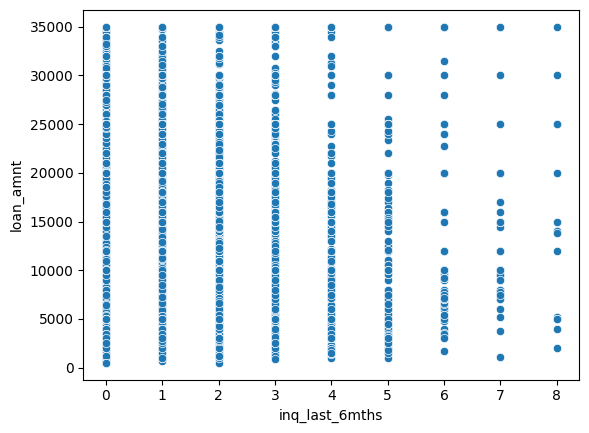

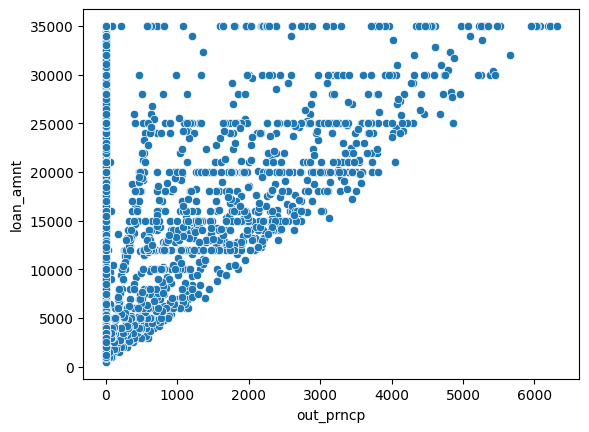

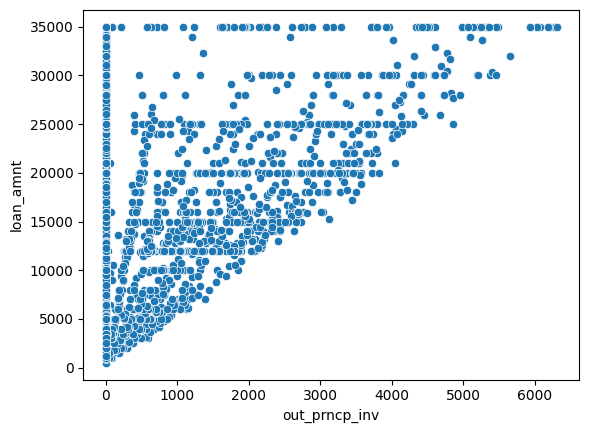

In [125]:
# Bivariate Analysis
for i in num_cols:
    sns.scatterplot(x=df1[i],y=df1["loan_amnt"])
    plt.show()

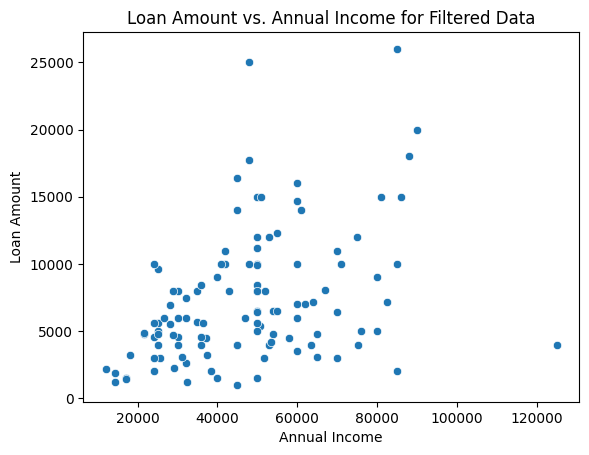

In [225]:
# Bivariate Analysis - 
# 1. If home ownership df1["home_ownership"] is "Rent"
# 2. If Emp Length df1["emp_length"] < 3
# 3. If Grade df1["grade"] is Equal to C
# 4. If Loan Status df1["pymnt_plan"] is Equal to "n"
# 5. If Loan Status df1["delinq_2yrs"] is Equal to 1

# Filter the DataFrame based on the conditions


filtered_df = df1[(df1['home_ownership'] == 'RENT') &
                  (df1['emp_length'] < 3) &
                  (df1['grade'] == 'C') &
                  (df1['pymnt_plan'] == 'n') &
                  (df1['delinq_2yrs'] == 1)]

filtered_df
 
# Create a scatter plot of loan amount vs. annual income
sns.scatterplot(x='annual_inc', y='loan_amnt', data=filtered_df)
plt.title('Loan Amount vs. Annual Income for Filtered Data')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

<h3>Multivariate Analysis</h3>

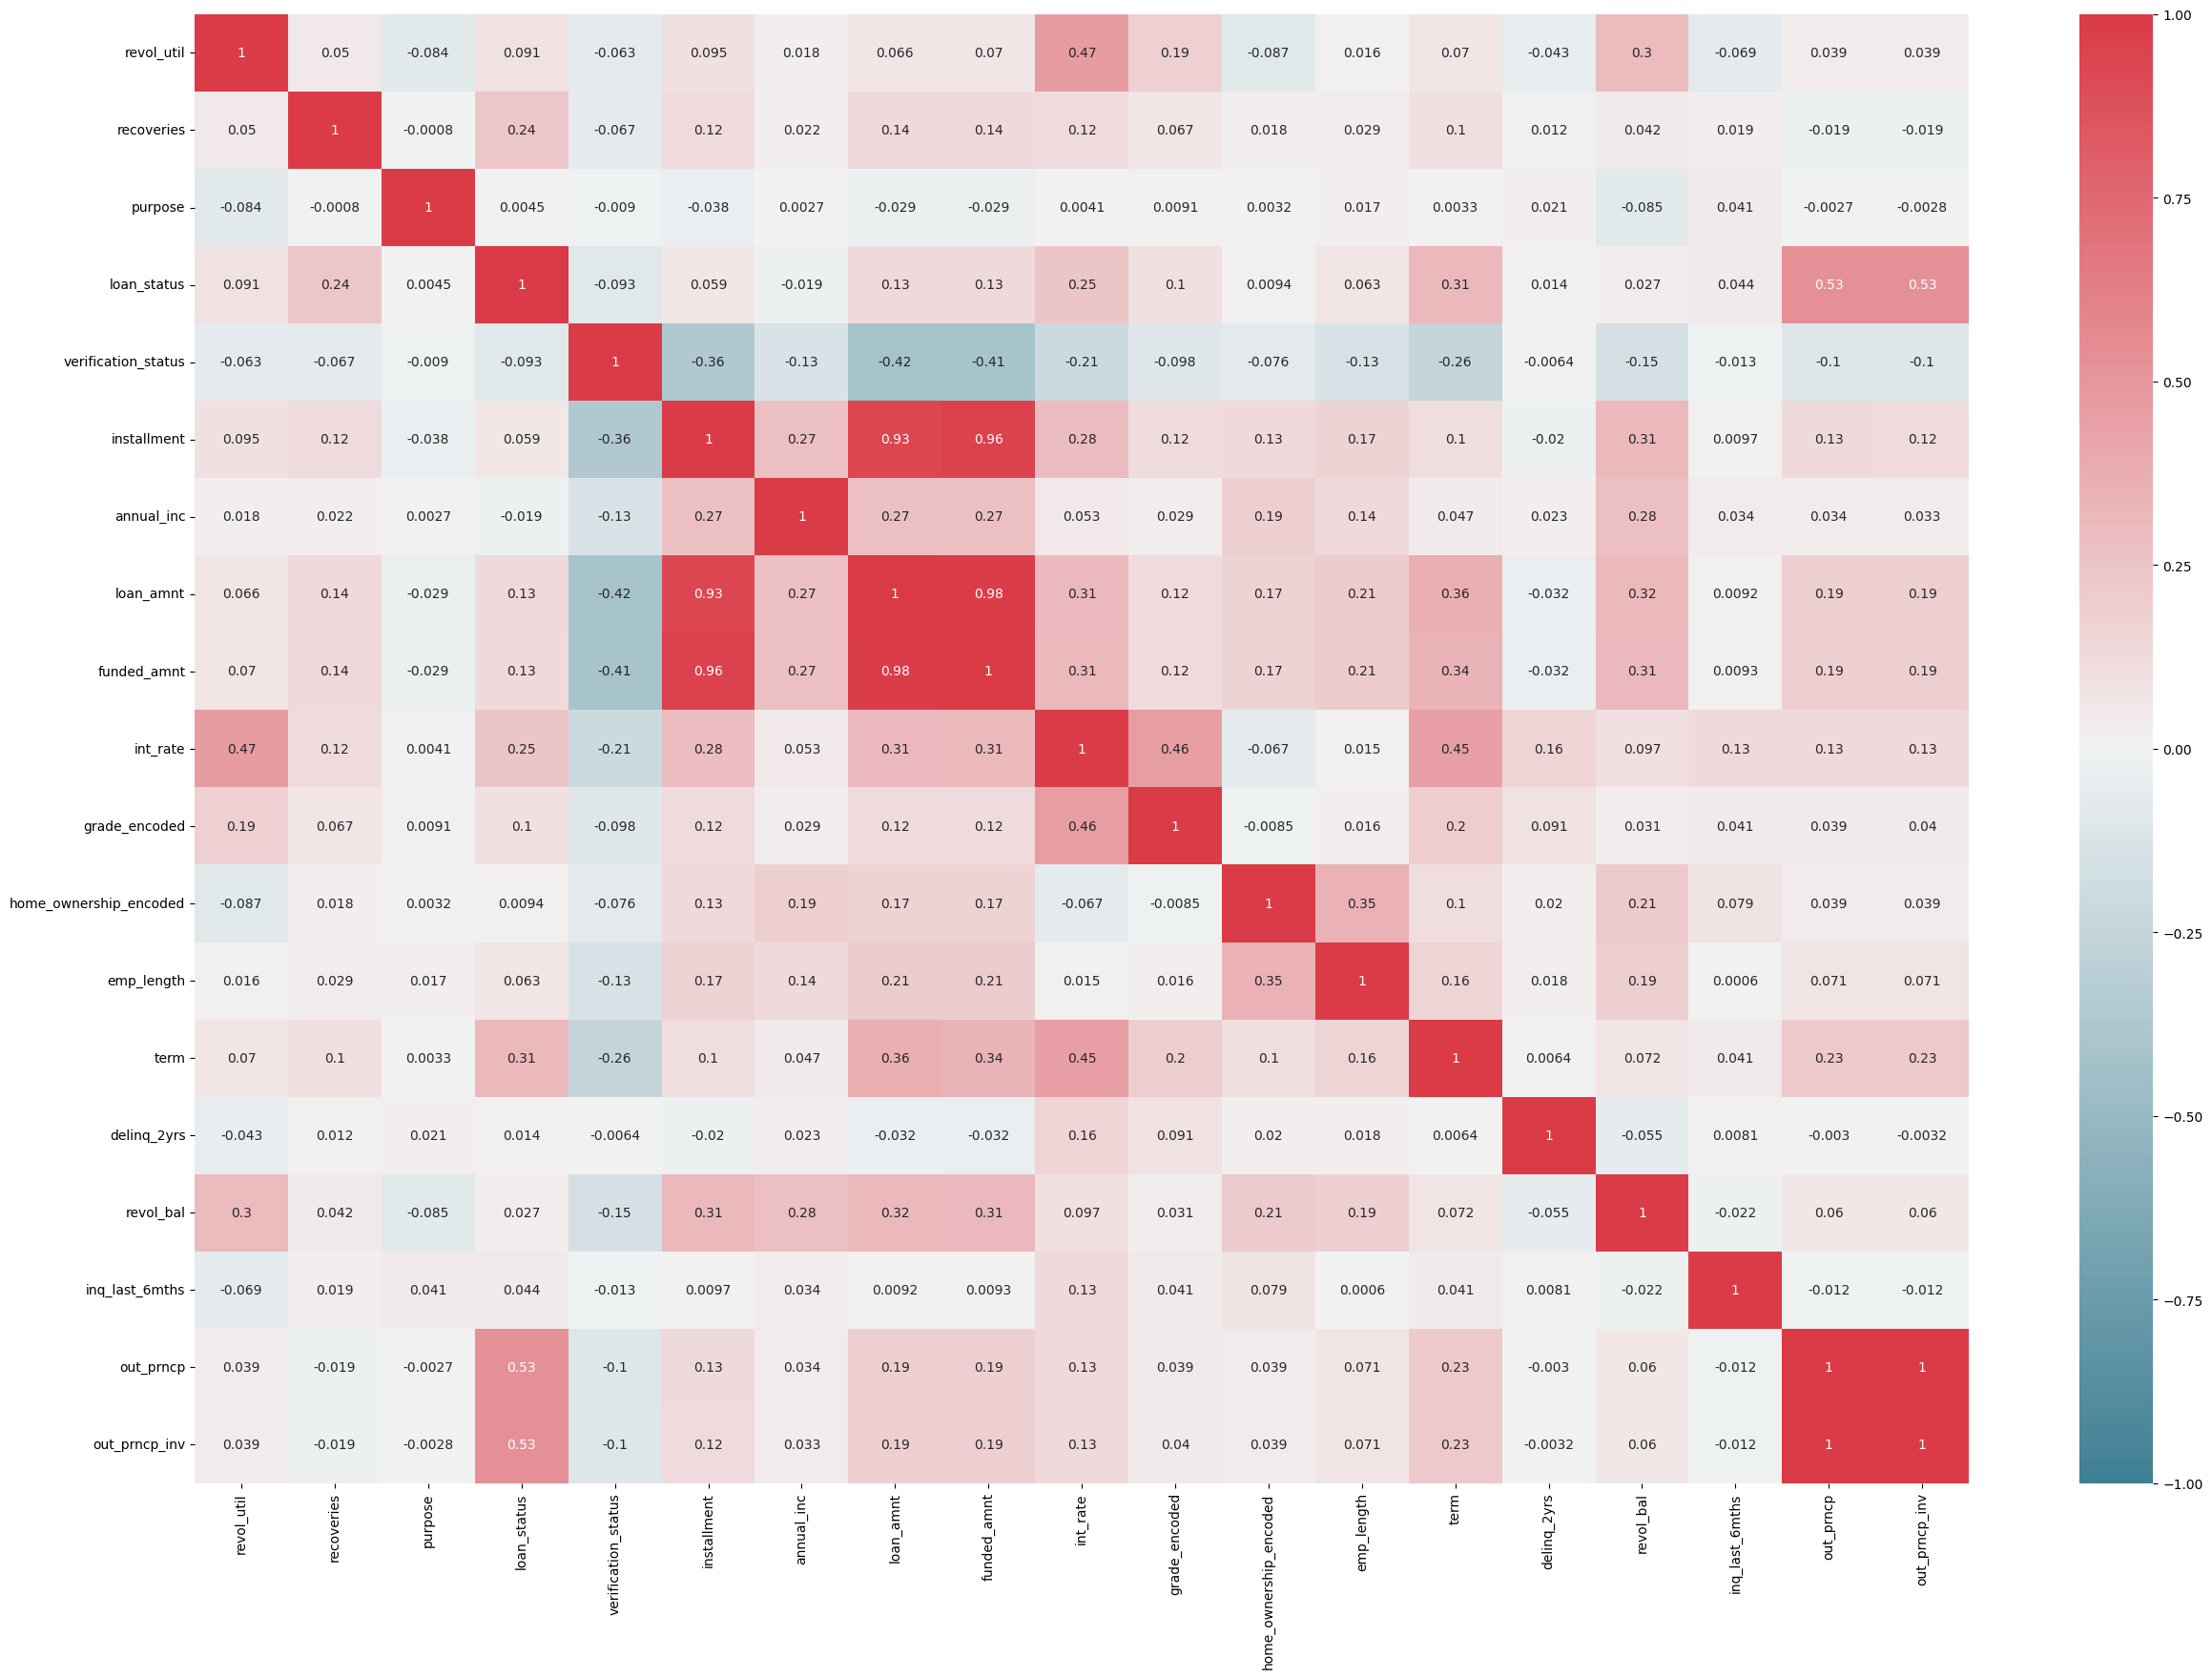

In [227]:
# Multivariate Analysis
plt.figure(figsize=(30,20))
# Create a custom colormap with green for positive correlations above 0.5
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df1[num_cols].corr(),cmap=cmap, vmin=-1, vmax=1,annot=True)
plt.show()

<h3>Univariate Analysis</h3>

<p1> Univariate Analysis help to identify the no of people have not paid instalments and these people can be defaulted
</p1>
